## Step 1 : Fetching the MNIST Data


In [35]:
from sklearn.datasets import fetch_openml

df=fetch_openml("mnist_784")

In [44]:
df

## Step 2 : Data Preprocessing

In [45]:
X, y = df['data'], df['target']


In [46]:
X.shape

In [47]:
y.shape

In [49]:
#splitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [63]:
print(X_train.shape, y_train.shape)

(52500, 784) (52500,)


In [64]:
print(X_test.shape, y_test.shape)

(17500, 784) (17500,)


## Step 3 : Visualising Data


In [57]:
#each image is stored in a row

X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [54]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

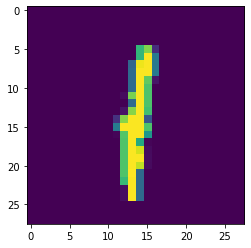

In [66]:
#each image is 28*28 pixels

img=X_train[0].reshape(28,28)
#plt.imshow(img, cmap='gray')
plt.imshow(img)

In [58]:
y_train[0]

'1'

## Step 4 : Applying ML Algorithm

In [77]:
def dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

def KNN(X, y, query, k=5):
    arr=[]
    for i in range(X.shape[0]):
        d=dist(X[i], query)
        arr.append((d,y[i]))
    arr=np.array(sorted(arr))
    arr=arr[:k]
    val,cnt=np.unique(arr[:,1], return_counts=True)
    index=cnt.argmax()
    pred=val[index]
    return pred
    
   

In [78]:
ans = []

for query in X_test:
    ans.append(KNN(X_train, y_train, query))
    
y_pred = np.array(ans)


In [85]:
data=pd.DataFrame(y_pred, columns=['digit'])
data.to_csv('y_pred.csv')

In [81]:
d2=pd.DataFrame(y_test, columns=['digit'])
d2.to_csv('y_test.csv')

## Step 5 : Accuracy calculation

In [91]:
count = 0
for i in range(y_test.shape[0]):
    count+=1 if y_test[i]==y_pred[i] else 0
print("Accuracy of KNN is ", (count/y_test.shape[0])*100)
print("No of rows are ",y_test.shape[0])
print("Correct observations are ", count)

Accuracy of KNN is  96.93714285714286
No of rows are  17500
Correct observations are  16964
